In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
df = pd.read_csv('C:/lint/data/report1.csv') #Загружен набор данных из первого модуля

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 955035 entries, 0 to 955034
Data columns (total 20 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   vendor_id              955035 non-null  int64  
 1   pickup_datetime        955035 non-null  object 
 2   dropoff_datetime       955035 non-null  object 
 3   passenger_count        955035 non-null  int64  
 4   pickup_longitude       955035 non-null  float64
 5   pickup_latitude        955035 non-null  float64
 6   dropoff_longitude      955035 non-null  float64
 7   dropoff_latitude       955035 non-null  float64
 8   store_and_fwd_flag     955035 non-null  int64  
 9   speed_travel_category  955035 non-null  float64
 10  maximum temperature    955035 non-null  float64
 11  minimum temperature    955035 non-null  float64
 12  average temperature    955035 non-null  float64
 13  precipitation          955035 non-null  float64
 14  snow fall              955035 non-nu

In [4]:
df

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,speed_travel_category,maximum temperature,minimum temperature,average temperature,precipitation,snow fall,snow depth,year,month,day,hour
0,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,0,2.0,10.555556,4.444444,7.500000,0.29,0.0,0.0,2016,3,14,17
1,1,2016-03-14 14:05:39,2016-03-14 14:28:05,1,-73.975090,40.758766,-73.953201,40.765068,0,4.0,10.555556,4.444444,7.500000,0.29,0.0,0.0,2016,3,14,14
2,1,2016-03-14 15:04:38,2016-03-14 15:16:13,1,-73.994484,40.745087,-73.998993,40.722710,0,3.0,10.555556,4.444444,7.500000,0.29,0.0,0.0,2016,3,14,15
3,2,2016-03-14 04:24:36,2016-03-14 04:37:11,3,-73.944359,40.714489,-73.910530,40.709492,0,3.0,10.555556,4.444444,7.500000,0.29,0.0,0.0,2016,3,14,4
4,2,2016-03-14 14:57:56,2016-03-14 15:15:26,1,-73.952881,40.766468,-73.978630,40.761921,0,4.0,10.555556,4.444444,7.500000,0.29,0.0,0.0,2016,3,14,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
955030,2,2016-04-03 01:57:00,2016-04-03 02:20:00,1,-73.987907,40.720570,-73.977890,40.664261,0,4.0,10.000000,1.111111,5.555556,0.09,0.0,0.0,2016,4,3,2
955031,1,2016-04-03 20:06:00,2016-04-03 20:10:00,1,-73.995155,40.754650,-73.987556,40.760303,0,1.0,10.000000,1.111111,5.555556,0.09,0.0,0.0,2016,4,3,20
955032,2,2016-04-03 10:17:00,2016-04-03 10:20:00,4,-73.966782,40.767059,-73.963593,40.773682,0,1.0,10.000000,1.111111,5.555556,0.09,0.0,0.0,2016,4,3,10
955033,2,2016-04-03 11:06:00,2016-04-03 11:19:00,1,-74.006592,40.733021,-73.997162,40.716499,0,3.0,10.000000,1.111111,5.555556,0.09,0.0,0.0,2016,4,3,11


<AxesSubplot:>

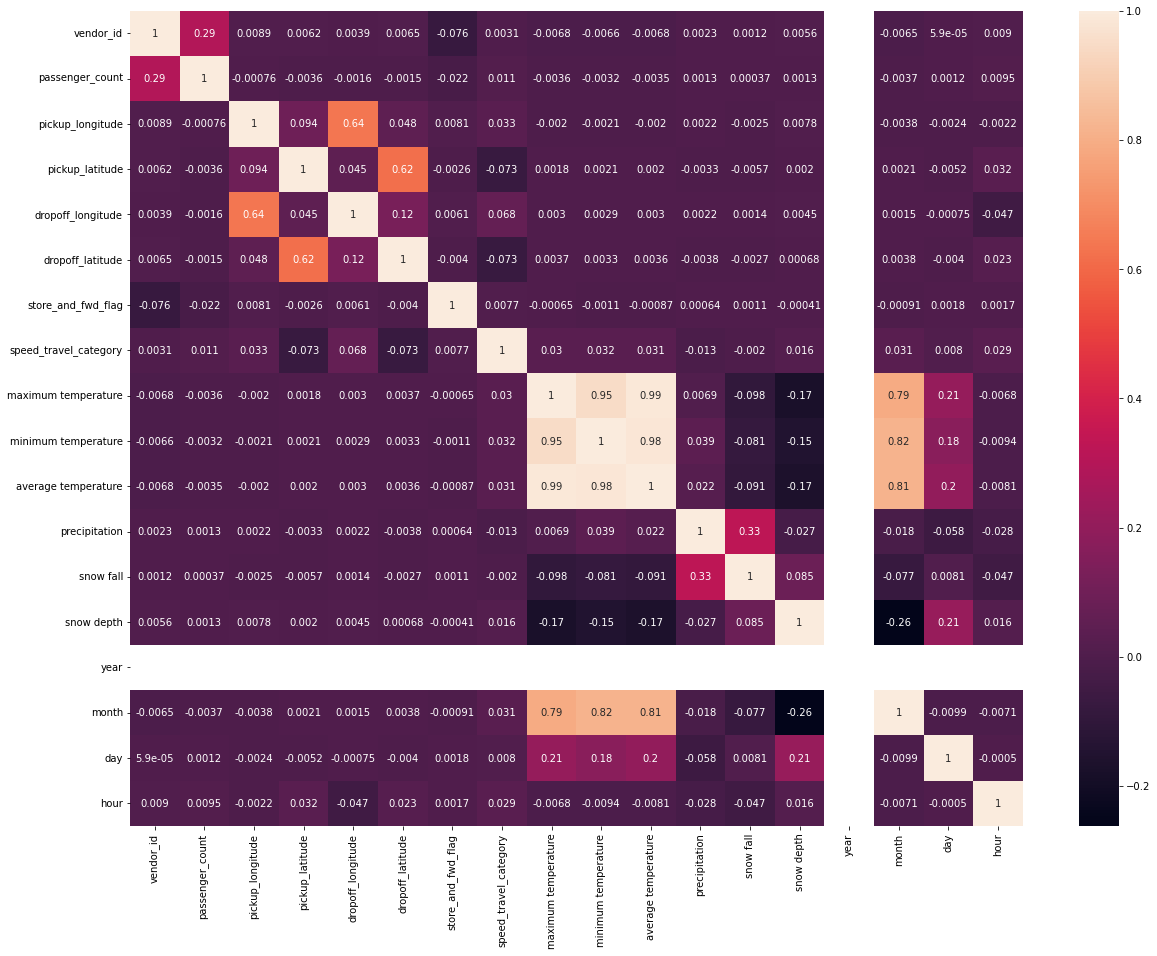

In [5]:
plt.figure(figsize=(20, 15))

sns.heatmap(df.corr(), annot=True)

In [6]:
#Перевод категориального столбца в категориальный формат
df['category_travel_time'] = df['speed_travel_category'].astype('category')

<AxesSubplot:>

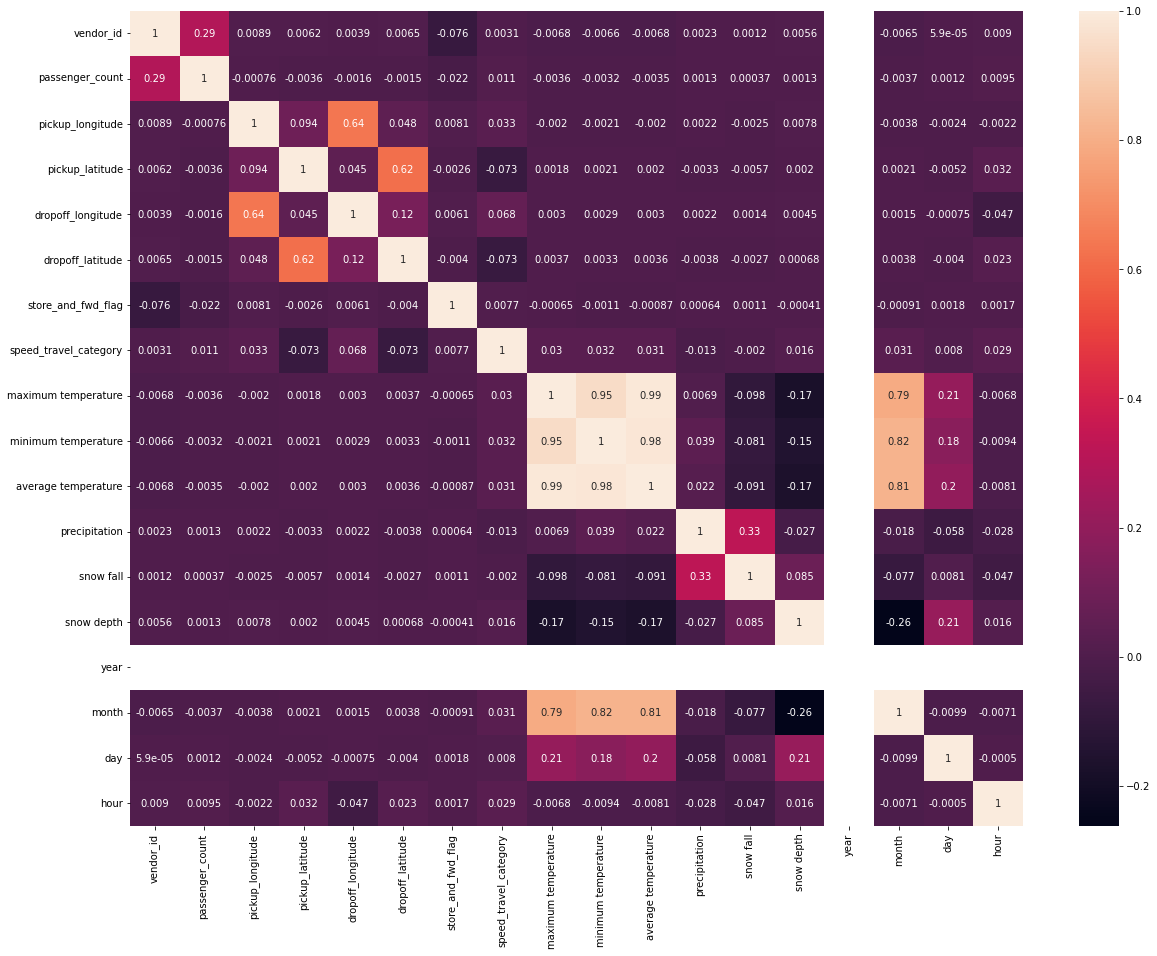

In [7]:
plt.figure(figsize=(20, 15))

sns.heatmap(df.corr(), annot=True)

In [8]:
#удалим коллинеарные признаки
df.drop(['maximum temperature','minimum temperature'], axis=1, inplace=True)

<AxesSubplot:xlabel='passenger_count', ylabel='count'>

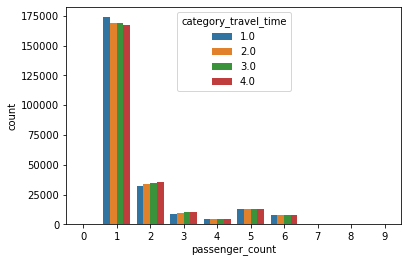

In [9]:
sns.countplot(x='passenger_count', data = df, hue = 'category_travel_time')

In [10]:
#из графика выше можно заметить, что количество пассажиров не даёт ощутимого влияния на длительность поездки

In [11]:
df = df.drop(['pickup_datetime', 'pickup_latitude','pickup_longitude', 'dropoff_longitude','dropoff_latitude', 'dropoff_datetime'], axis = 1)
#удаляем данные, которые не будут использоваться в обучении